# Heart disease prediction

## Project description

Heart disease is a common and potentially life-threatening condition that affects millions of people worldwide. Early detection and accurate prediction of heart disease are critical for timely intervention and improved patient outcomes. The project aims to predict a person's likelihood of developing heart disease based on various health-related characteristics. Predictive models utilize machine learning algorithms to analyze and interpret input data.

The project involved analysis of the heart disease patient dataset with proper data processing. Then use different machine learning models to train and predictions, including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest. The objective is to predict heart disease based on a comprehensive dataset, addressing a classification problem with input features representing various parameters.The project utilizes a variety of machine learning algorithms implemented in Python to predict the presence of heart disease in a patient.

## Dataset description

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

#### Columns description

1. age - The person’s age in years
2. sex - The person’s sex: 1 = male, 0 = female
3. cp - chest pain type (4 values): 0 = asymptomatic, 1 = atypical angina, 2 = non-angina pain, 3 = typical angina
4. trestbps - resting blood pressure (in min Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl: 1 = true, 0 = false
7. restecg - resting electrocardiographic results (3 values): 0 - showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1 = normal, 2 = having ST-T wave abnormality
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina: 1 = yes, 0 = no
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment: 0 = downsloping, 1 = flat, 2 = uploping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - a blood disorder called thalassemia: 0 = NULL (dropped from the dataset previously), 1 = fixed defect (no blood flow in some part of the heart), 2 = normal blood flow, 3 = reversible defect (a blood flow is observed but it is not normal)


## Dependencies loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from pathlib import Path

## Project setup

In [2]:
raw_input_data_path = "../data/input"
preprocessed_output_data_path = "../data/output"

## Data preparation

### Data loading

In [3]:
df = pd.read_csv(f"{raw_input_data_path}/heart.csv")

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

#### Shape of dataset

In [6]:
df.shape

(1025, 14)

### Data processing

#### encode the features into categorical variables

In [7]:
# converting features to categorical features 

df['cp'][df['cp'] == 0] = 'asymptomatic'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'typical angina'

df['restecg'][df['restecg'] == 0] = 'left ventricular hypertrophy'
df['restecg'][df['restecg'] == 1] = 'normal'
df['restecg'][df['restecg'] == 2] = 'ST-T wave abnormality'

df['slope'][df['slope'] == 0] = 'downsloping'
df['slope'][df['slope'] == 1] = 'flat'
df['slope'][df['slope'] == 2] = 'upsloping'

df['thal'][df['thal'] == 0] = 'null'
df['thal'][df['thal'] == 1] = 'fixed defect'
df['thal'][df['thal'] == 2] = 'normal'
df['thal'][df['thal'] == 3] = 'reversable defect'

df["sex"] = df.sex.apply(lambda  x:'Male' if x==1 else 'Female')

In [8]:
df['cp'].value_counts()

cp
asymptomatic        497
non-anginal pain    284
atypical angina     167
typical angina       77
Name: count, dtype: int64

In [9]:
df['restecg'].value_counts()

restecg
normal                          513
left ventricular hypertrophy    497
ST-T wave abnormality            15
Name: count, dtype: int64

In [10]:
df['slope'].value_counts()

slope
flat           482
upsloping      469
downsloping     74
Name: count, dtype: int64

In [11]:
df['thal'].value_counts()

thal
normal               544
reversable defect    410
fixed defect          64
null                   7
Name: count, dtype: int64

In [12]:
#dropping row with thal is null
df.drop(df[df.thal =='null'].index, inplace=True)
#checking distribution
df['thal'].value_counts()

thal
normal               544
reversable defect    410
fixed defect          64
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()

sex
Male      709
Female    309
Name: count, dtype: int64

In [14]:
df.head()

age     sex            cp  trestbps  chol  fbs  \
0   52    Male  asymptomatic       125   212    0   
1   53    Male  asymptomatic       140   203    1   
2   70    Male  asymptomatic       145   174    0   
3   61    Male  asymptomatic       148   203    0   
4   62  Female  asymptomatic       138   294    1   

                        restecg  thalach  exang  oldpeak        slope  ca  \
0                        normal      168      0      1.0    upsloping   2   
1  left ventricular hypertrophy      155      1      3.1  downsloping   0   
2                        normal      125      1      2.6  downsloping   0   
3                        normal      161      0      0.0    upsloping   1   
4                        normal      106      0      1.9         flat   3   

                thal  target  
0  reversable defect       0  
1  reversable defect       0  
2  reversable defect       0  
3  reversable defect       0  
4             normal       0

In [15]:
df.shape

(1018, 14)

### Dataset splitting

Split dataset into train set (80%) and test set (20%).
Test dataset will be used only for the final predictions! We assume that during the entire study they do not have access to it and do not study its statistical properties.

In [16]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 5)

In [17]:
df_train.shape

(814, 14)

In [18]:
df_train.head()

age     sex                cp  trestbps  chol  fbs  \
166   56    Male      asymptomatic       132   184    0   
41    54    Male  non-anginal pain       120   258    0   
763   58  Female    typical angina       150   283    1   
826   42    Male  non-anginal pain       130   180    0   
936   43    Male  non-anginal pain       130   315    0   

                          restecg  thalach  exang  oldpeak      slope  ca  \
166  left ventricular hypertrophy      105      1      2.1       flat   1   
41   left ventricular hypertrophy      147      0      0.4       flat   0   
763  left ventricular hypertrophy      162      0      1.0  upsloping   0   
826                        normal      150      0      0.0  upsloping   0   
936                        normal      162      0      1.9  upsloping   1   

                  thal  target  
166       fixed defect       0  
41   reversable defect       1  
763             normal       1  
826             normal       1  
936             normal       1

In [19]:
df_test.shape

(204, 14)

In [20]:
Path(preprocessed_output_data_path).mkdir(parents=True, exist_ok=True)

In [21]:
df_train.to_csv(f"{preprocessed_output_data_path}/train.csv")
df_test.to_csv(f"{preprocessed_output_data_path}/test.csv")

## Exploratory Data Analysis (EDA)

### Types of data

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 166 to 873
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       814 non-null    int64  
 1   sex       814 non-null    object 
 2   cp        814 non-null    object 
 3   trestbps  814 non-null    int64  
 4   chol      814 non-null    int64  
 5   fbs       814 non-null    int64  
 6   restecg   814 non-null    object 
 7   thalach   814 non-null    int64  
 8   exang     814 non-null    int64  
 9   oldpeak   814 non-null    float64
 10  slope     814 non-null    object 
 11  ca        814 non-null    int64  
 12  thal      814 non-null    object 
 13  target    814 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 95.4+ KB


### Checking the missing value

In [23]:
df_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Summary statistics

In [24]:
# summary statistics of numerical columns
df_train.describe()

age    trestbps        chol         fbs     thalach       exang  \
count  814.000000  814.000000  814.000000  814.000000  814.000000  814.000000   
mean    54.734644  132.302211  247.660934    0.157248  148.916462    0.335381   
std      8.856425   18.006206   53.040846    0.364258   22.709902    0.472414   
min     29.000000   94.000000  126.000000    0.000000   71.000000    0.000000   
25%     48.000000  120.000000  212.000000    0.000000  132.000000    0.000000   
50%     56.000000  130.000000  241.000000    0.000000  152.000000    0.000000   
75%     61.000000  140.000000  278.000000    0.000000  165.000000    1.000000   
max     77.000000  200.000000  564.000000    1.000000  202.000000    1.000000   

          oldpeak          ca      target  
count  814.000000  814.000000  814.000000  
mean     1.103686    0.788698    0.506143  
std      1.195064    1.056612    0.500270  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.800000    0.000000    1.000000  
75%      1.800000    1.000000    1.000000  
max      6.200000    4.000000    1.000000

In [25]:
# summary statistics of categorical columns
df_train.describe(include =['O'])

sex            cp restecg slope    thal
count    814           814     814   814     814
unique     2             4       3     3       3
top     Male  asymptomatic  normal  flat  normal
freq     570           400     406   386     425

### Distribution of Heart disease (target variable)

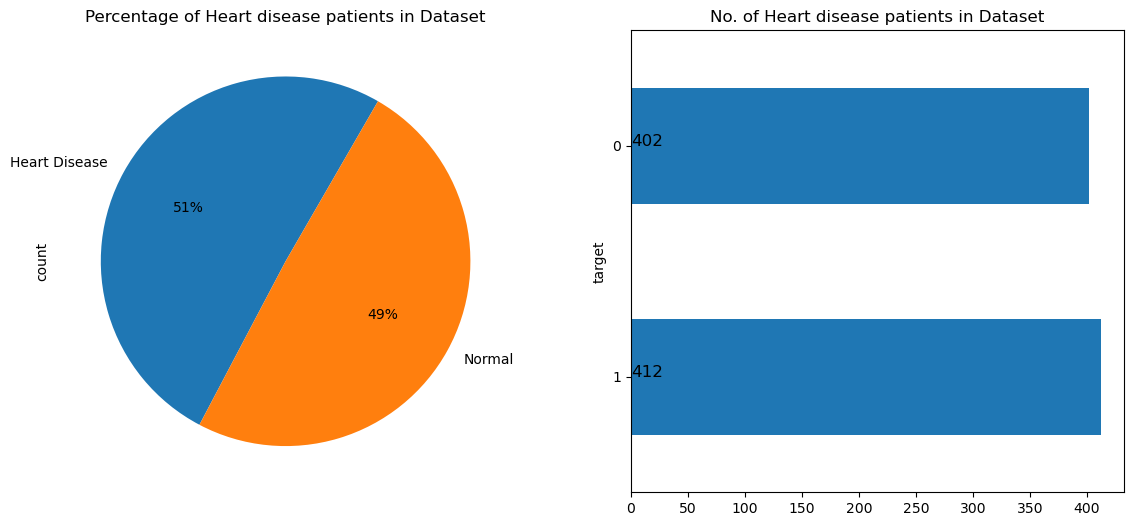

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df_train['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df_train["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df_train["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()





The dataset is balanced having 402 heart disease patients and 412 normal patients

### Checking Gender & Age Distribution

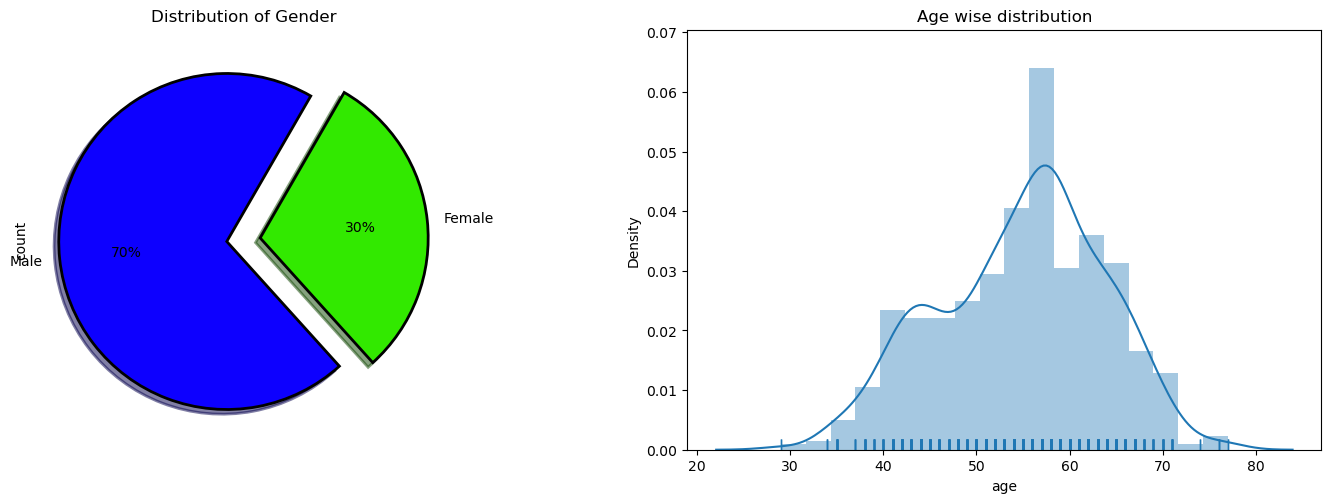

In [27]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df_train["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df_train['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 56

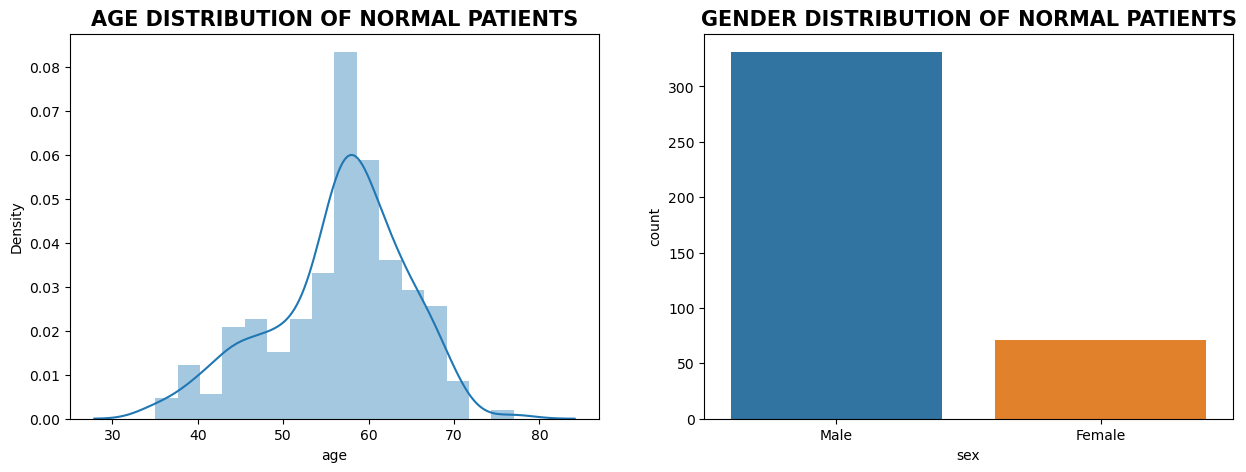

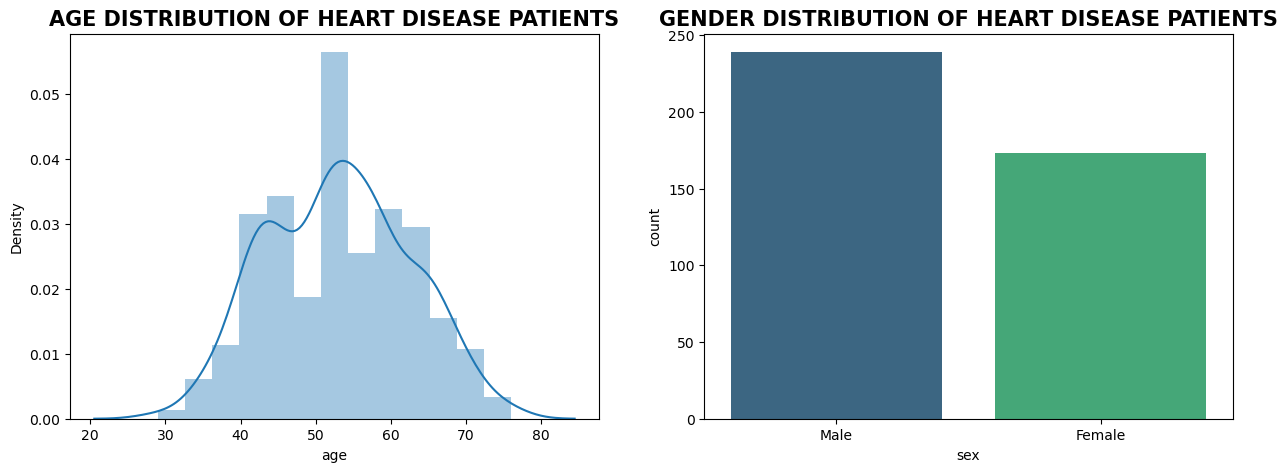

In [28]:
# creating separate df_train for normal and heart patients

attr_1=df_train[df_train['target']==1]

attr_0=df_train[df_train['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0, x = 'sex')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'sex', palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

More males accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 52 to 54 years

### Distribution of Chest Pain Type

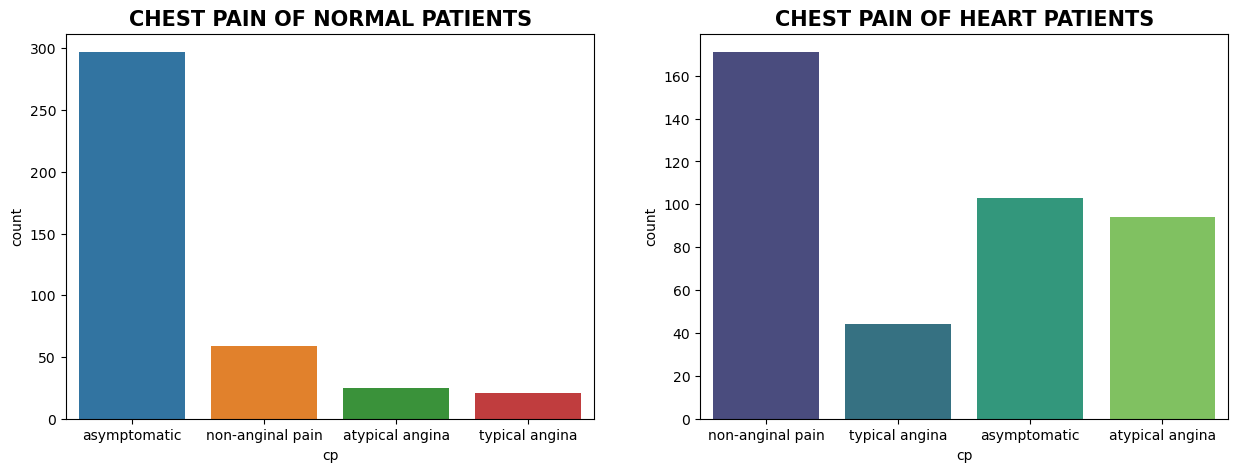

In [29]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'cp')
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'cp', palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [30]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['cp', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

As we can see from above plot 41.5% of the chest pain type of the heart disease patients have non-anginal pain.

### Distribution of fasting blood sugar

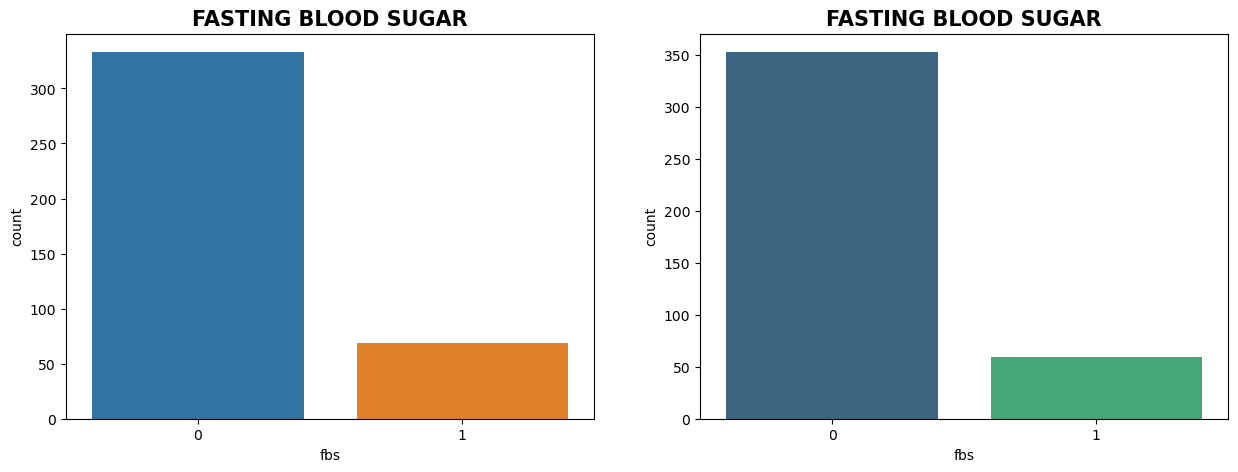

In [31]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'fbs')
plt.title('FASTING BLOOD SUGAR', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'fbs', palette='viridis')
plt.title('FASTING BLOOD SUGAR', fontsize=15, weight='bold' )
plt.show()

In [32]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['fbs', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

There is no clear relationship between fasting blood sugar with heart disease

### Distribution of Rest ECG

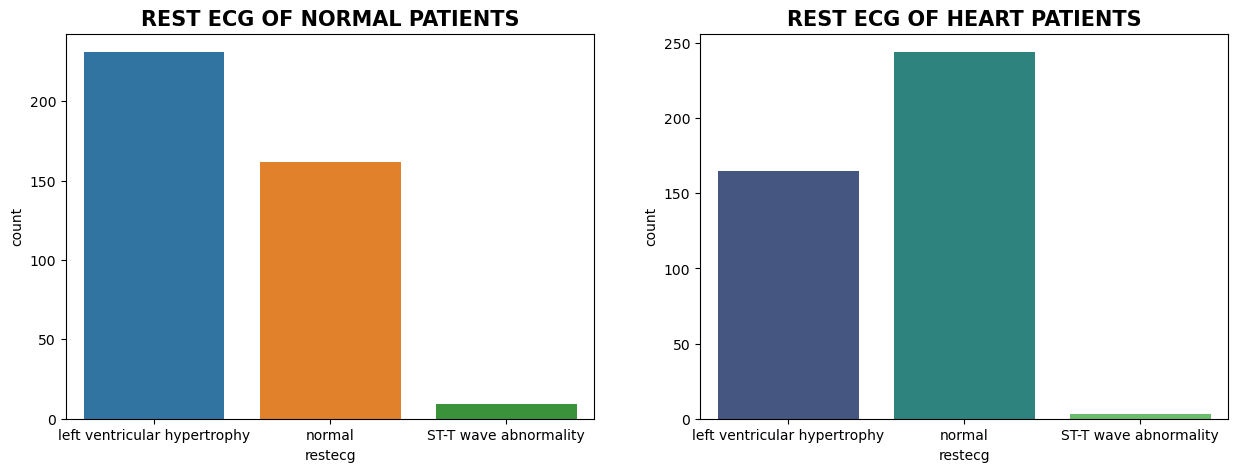

In [33]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'restecg')
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'restecg', palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [34]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['restecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 59% heart disease patients have normal ECG

### Distribution of exercise induced angina

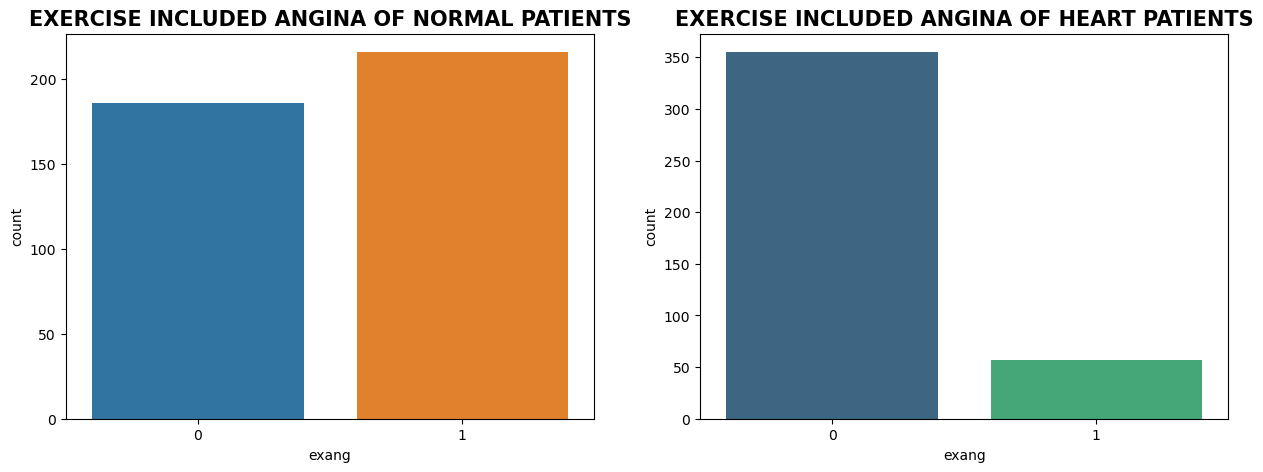

In [35]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'exang')
plt.title('EXERCISE INCLUDED ANGINA OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'exang', palette='viridis')
plt.title('EXERCISE INCLUDED ANGINA OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [36]:
#Exploring the Heart Disease patients based on exercise induced angina
plot_criteria= ['exang', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

86.17% of the heart patients have no exercise included angina

### Distribution of ST Slope

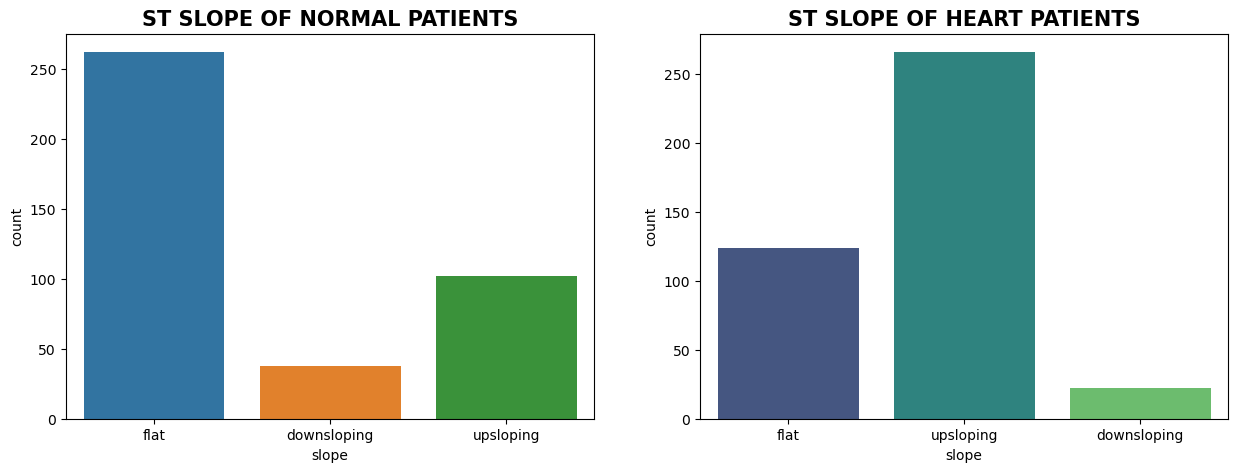

In [37]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'slope')
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'slope', palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [38]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Flat is positive sign as 65.17% of the normal patients have flat sloping where as 64.56% heart patients have upsloping.

### Distribution of Numerical features

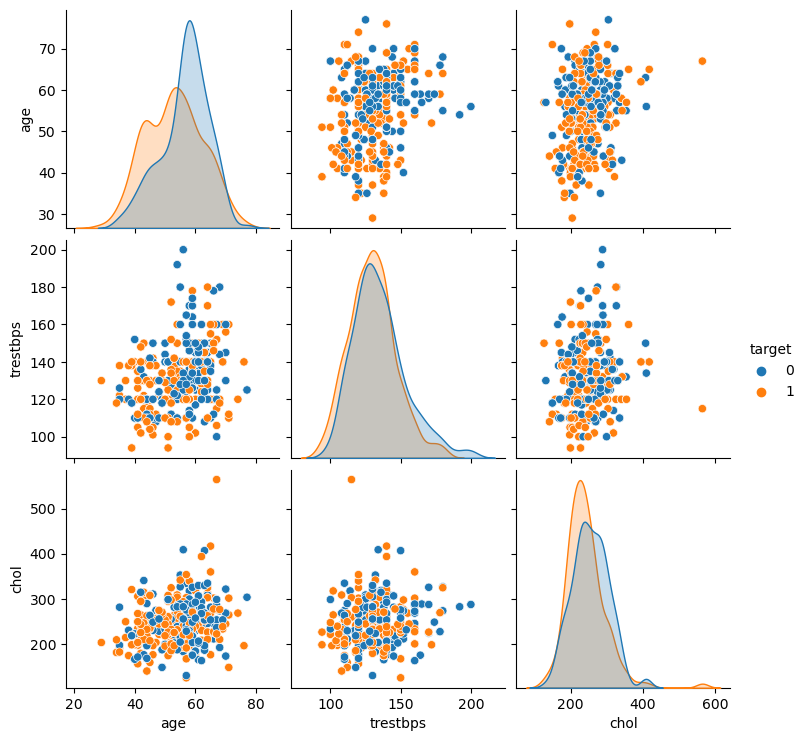

In [39]:
sns.pairplot(df_train, hue = 'target', vars = ['age', 'trestbps', 'chol'] )

It seems age may impact chances of heart disease

<Axes: xlabel='trestbps', ylabel='chol'>

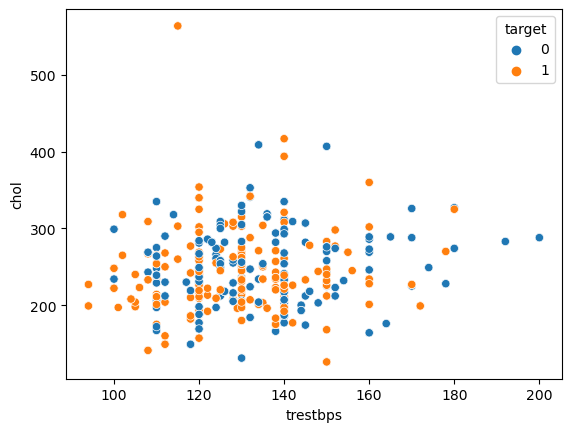

In [40]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = df_train)

<Axes: xlabel='trestbps', ylabel='age'>

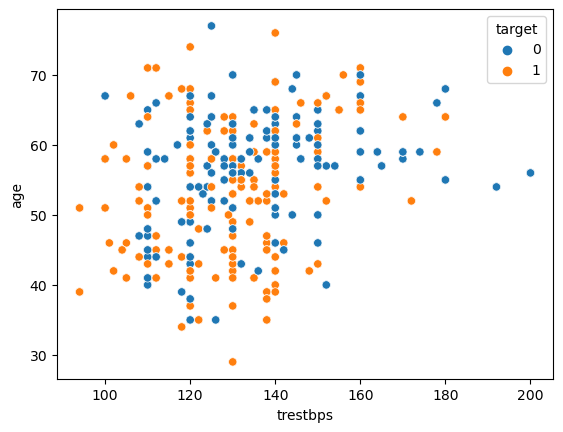

In [41]:
sns.scatterplot(x = 'trestbps', y = 'age', hue = 'target', data = df_train)

<Axes: xlabel='ca', ylabel='count'>

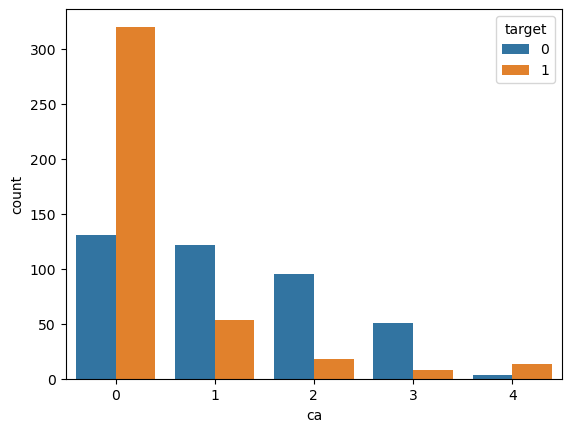

In [42]:
sns.countplot(x = 'ca', hue = 'target', data = df_train)

It seems low number of major vessels may be associated with a high risk of heart disease